In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import src.dynadojo as dd
import numpy as np

2023-10-29 14:32:11.210615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1,)
1 50
(1,)
1 50


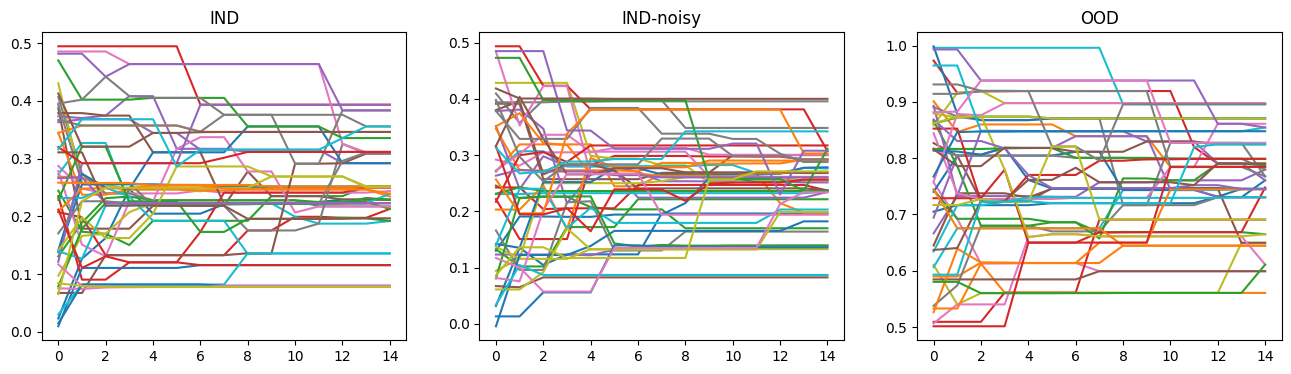

In [3]:
# Deffuant system, which simulates pair-wise interactions. Bias is added to simulate algorthmic sway
latent_dim = [50]
embed_dim = 50
n = 1
timesteps = 15
for dim in latent_dim:
    system = dd.systems.opinion.DeffuantSystem(dim, embed_dim, epsilon=0.3, bias=0.8, noise_scale=0.005)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

(1,)
1 50
(1,)
1 50


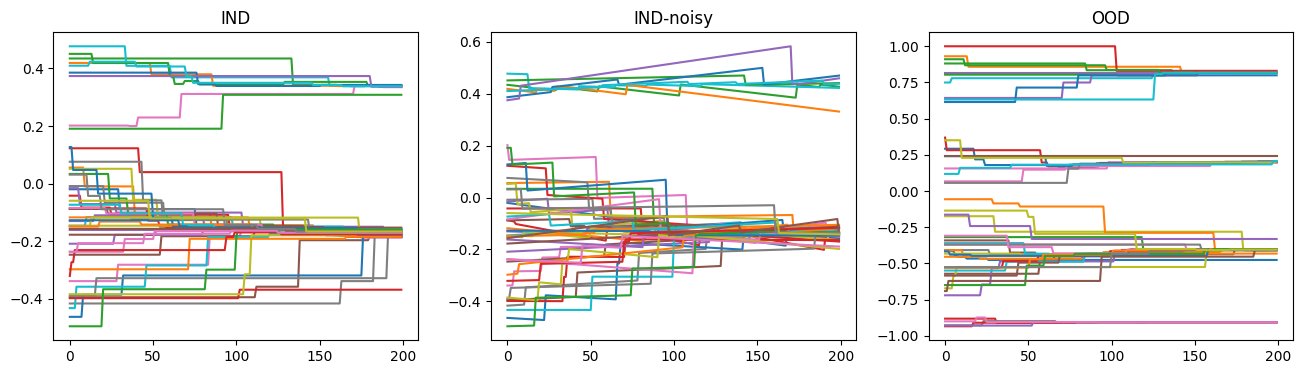

In [4]:
# Hegselmann-Krause (HK) system, which simulates how a person is affected by a group of neighbors, which shoes people's opinions clustering together
latent_dim = [50]
embed_dim = 50
n = 1
timesteps = 200
for dim in latent_dim:
    system = dd.systems.opinion.HKSystem(dim, embed_dim, epsilon=0.2, noise_scale=0.0005)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

(1,)
1 50
(1,)
1 50


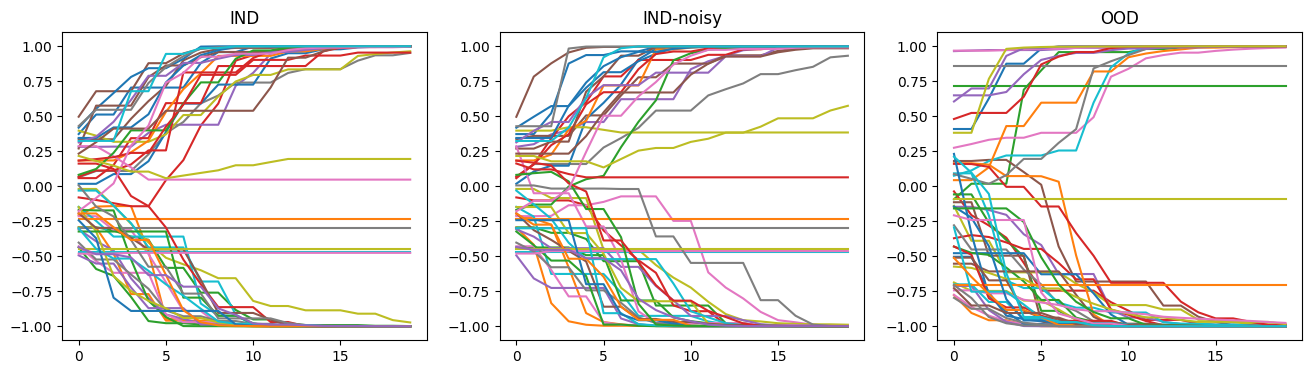

In [5]:
# Weighted Hegselmann-Krause (WHK) system, where certain bonds are prioritized within the neighborhood, shows people polarizing rapidly
latent_dim = [50]
embed_dim = 50
n = 1
timesteps = 20
for dim in latent_dim:
    system = dd.systems.opinion.WHKSystem(dim, embed_dim, epsilon=0.6, noise_scale=0.0005)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

(1,)
1 50
(1,)
1 50


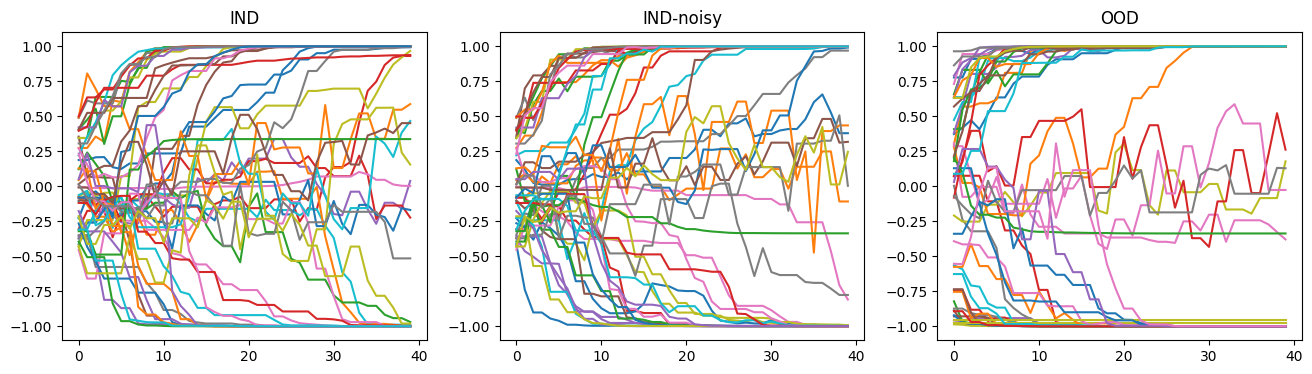

In [6]:
# Attraction-Repulsion Weighted Hegselmann-Krause (WHK) system, where people are cyclically drawn in and away from neighbors,
# shows lots of opinion shifting before some polarization
latent_dim = [50]
embed_dim = 50
n = 1
timesteps = 40
for dim in latent_dim:
    system = dd.systems.opinion.ARWHKSystem(dim, embed_dim, epsilon=0.3, noise_scale=0.0005)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

In [7]:
# Note: This System requires manual cloning of NDlib for now, see more info in System's file
# Algorithmic Bias with Meida system, which simulates pair-wise interactions, with media influence that has a certain biased sway
latent_dim = [50]
embed_dim = 50
n = 1
timesteps = 15
for dim in latent_dim:
    system = dd.systems.opinion.MediaBiasSystem(dim, embed_dim, epsilon=0.3, bias=0, n_media=4, bias_media=0.2, noise_scale=0.005)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

(1,)
1 50
(1,)
1 50


AttributeError: module 'ndlib.models.opinions' has no attribute 'AlgorithmicBiasMediaModel'